In [3]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!pip install -q streamlit
!pip install -q pyngrok
!pip install -q tensorflow
!pip install -q -U efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.8 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os

# Check contents inside your MyDrive
os.listdir('/content/drive/MyDrive')


['Colab Notebooks',
 'ecommerce demo.mp4',
 'Resume Template · 0 Work Experience.gdoc',
 'dataset']

In [7]:
dataset_path = '/content/drive/MyDrive/dataset'

# Confirm it's correct
print(os.listdir(dataset_path))
print(os.listdir(os.path.join(dataset_path, 'train')))
print(os.listdir(os.path.join(dataset_path, 'test')))


['test', 'train']
['fresh', 'rotten']
['fresh', 'rotten']


Found 3313 images belonging to 2 classes.
Found 804 images belonging to 2 classes.
Classes: ['fresh', 'rotten']
Training samples: 3313
Test samples: 804
Number of classes: 2


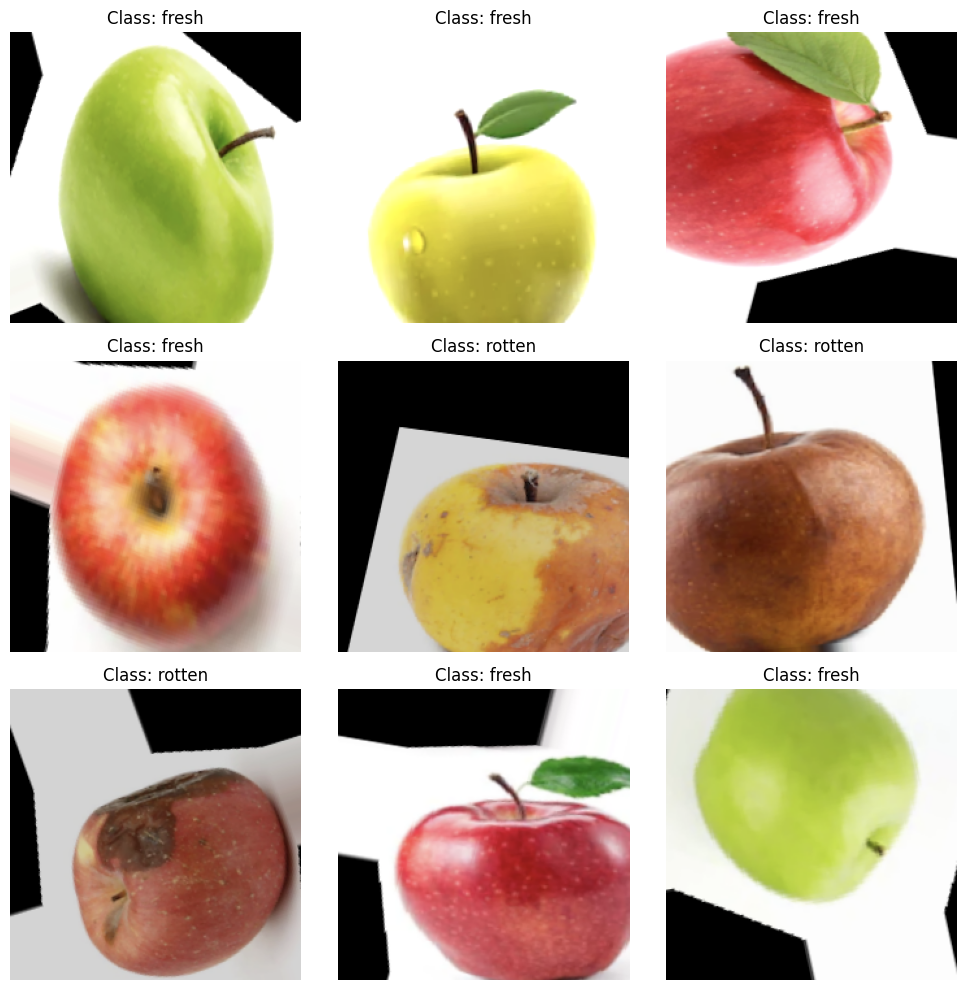

Image preprocessing complete. Generators are ready for model training.


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Define data paths
train_data_dir = '/content/drive/MyDrive/dataset/train/'
test_data_dir = '/content/drive/MyDrive/dataset/test/'

# Define parameters
img_width, img_height = 224, 224
batch_size = 32

# Create ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values
    rotation_range=20,           # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,       # Randomly shift image width by up to 20%
    height_shift_range=0.2,      # Randomly shift image height by up to 20%
    shear_range=0.2,             # Shear intensity
    zoom_range=0.2,              # Range for random zoom
    horizontal_flip=True,        # Randomly flip images horizontally
    brightness_range=[0.8, 1.2], # Random brightness adjustment
    fill_mode='nearest'          # Strategy for filling newly created pixels
)

# Create ImageDataGenerator for test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,              # This is the source directory for training images
    target_size=(img_width, img_height),  # All images will be resized to 224x224
    batch_size=batch_size,
    class_mode='binary',         # Using binary labels
    shuffle=True                 # Shuffle data
)

# Flow validation images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,               # This is the source directory for test images
    target_size=(img_width, img_height),  # All images will be resized to 224x224
    batch_size=batch_size,
    class_mode='binary',         # Using binary labels
    shuffle=False                # Don't shuffle test data
)

# Extract class names
class_names = list(train_generator.class_indices.keys())
print(f"Classes: {class_names}")

# Print dataset information
print(f"Training samples: {train_generator.samples}")
print(f"Test samples: {test_generator.samples}")
print(f"Number of classes: {len(class_names)}")

# Optional: Display augmented training images to verify the preprocessing
def visualize_augmented_images():
    # Get a batch of augmented images
    x_batch, y_batch = next(train_generator)

    # Create a figure with subplots
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_batch[i])
        plt.title(f"Class: {class_names[int(y_batch[i])]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Uncomment this to visualize some augmented images
visualize_augmented_images()

# The generators (train_generator and test_generator) are now ready to be used for model training
print("Image preprocessing complete. Generators are ready for model training.")

Loading TensorFlow version: 2.18.0
GPU Available: True
Building the model...
Base model (MobileNetV2) loaded with 154 layers (frozen)
Model successfully built and compiled
Model summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Model training started...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9080 - loss: 0.2105
Epoch 1: val_accuracy improved from -inf to 0.97637, saving model to /content/drive/MyDrive/apple_model_checkpoint.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 1018s 10s/step - accuracy: 0.9084 - loss: 0.2098 - val_accuracy: 0.9764 - val_loss: 0.0739
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.9725 - loss: 0.0740
Epoch 2: val_accuracy did not improve from 0.97637
104/104 ━━━━━━━━━━━━━━━━━━━━ 98s 670ms/step - accuracy: 0.9725 - loss: 0.0740 - val_accuracy: 0.9726 - val_loss: 0.0724
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9769 - loss: 0.0596
Epoch 3: val_accuracy improved from 0.97637 to 0.98010, saving model to /content/drive/MyDrive/apple_model_checkpoint.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 71s 685ms/step - accuracy: 0.9769 - loss: 0.0596 - val_accuracy: 0.9801 - val_loss: 0.0528
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.9811 - loss: 0.0457
Epoch 4: val_accuracy did not improve from 0.98010
104/104 ━━━━━━━━━━━━━━━━━━━━ 85s 709ms/step - accuracy: 0.9811 - loss: 0.0456 - val_accuracy: 0.9789 - val_loss: 0.0569
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.9802 - loss: 0.0498
Epoch 5: val_accuracy improved from 0.98010 to 0.99005, saving model to /content/drive/MyDrive/apple_model_checkpoint.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 70s 676ms/step - accuracy: 0.9802 - loss: 0.0497 - val_accuracy: 0.9900 - val_loss: 0.0385
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9853 - loss: 0.0338
Epoch 6: val_accuracy did not improve from 0.99005
104/104 ━━━━━━━━━━━━━━━━━━━━ 75s 719ms/step - accuracy: 0.9853 - loss: 0.0338 - val_accuracy: 0.9689 - val_loss: 0.0743
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.9831 - loss: 0.0420
Epoch 7: val_accuracy did not improve from 0.99005
104/104 ━━━━━━━━━━━━━━━━━━━━ 70s 670ms/step - accuracy: 0.9831 - loss: 0.0419 - val_accuracy: 0.9888 - val_loss: 0.0353
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.9943 - loss: 0.0208
Epoch 8: val_accuracy did not improve from 0.99005
104/104 ━━━━━━━━━━━━━━━━━━━━ 69s 667ms/step - accuracy: 0.9943 - loss: 0.0208 - val_accuracy: 0.9900 - val_loss: 0.0276
Epoch 9/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.9918 - loss: 0.0231
Epoch 9: val_ac

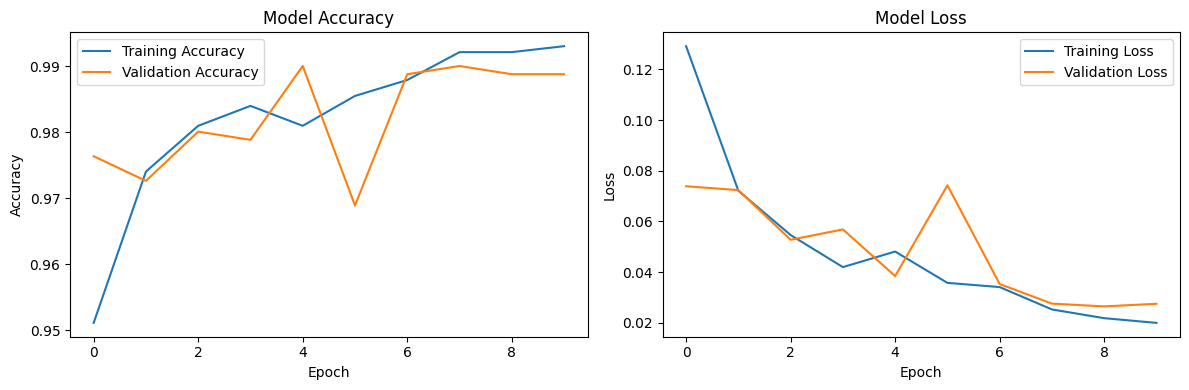

Model saved to /content/drive/MyDrive/apple_model.h5

Evaluating model on test data...
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.9859 - loss: 0.0458
Test Loss: 0.0385
Test Accuracy: 0.9900
Process complete!


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os

print("Loading TensorFlow version:", tf.__version__)
print("GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)

# Note: This script assumes train_generator and test_generator are already defined
# from the previous preprocessing script

print("Building the model...")

# Create the base model from pre-trained MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',          # Load pre-trained weights on ImageNet
    include_top=False,           # Don't include the top classification layer
    input_shape=(224, 224, 3)    # Input image dimensions
)

# Freeze the base model layers
base_model.trainable = False
print(f"Base model (MobileNetV2) loaded with {len(base_model.layers)} layers (frozen)")

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce parameters
x = Dense(128, activation='relu')(x)  # Dense layer with 128 units
x = Dropout(0.3)(x)  # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # Final layer with sigmoid for binary classification

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model successfully built and compiled")
print("Model summary:")
model.summary()

# Create callbacks
checkpoint_path = "/content/drive/MyDrive/apple_model_checkpoint.h5"
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

callbacks = [checkpoint, early_stopping]

# Train the model
print("\nModel training started...")
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=callbacks,
    verbose=1
)
print("Model training complete!")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/apple_model_training_history.png')
plt.show()

# Save the final model
final_model_path = "/content/drive/MyDrive/apple_model.h5"
model.save(final_model_path)
print(f"Model saved to {final_model_path}")

# Evaluate the model on the test data
print("\nEvaluating model on test data...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optional: Fine-tuning
# Uncomment the following code if you want to perform fine-tuning

"""
print("\nFine-tuning the model by unfreezing some layers...")
# Unfreeze the last few layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Fine-tuning started...")
history_fine = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks,
    verbose=1
)
print("Fine-tuning complete!")

# Save the fine-tuned model
fine_tuned_model_path = "/content/drive/MyDrive/apple_model_fine_tuned.h5"
model.save(fine_tuned_model_path)
print(f"Fine-tuned model saved to {fine_tuned_model_path}")

# Evaluate the fine-tuned model
print("\nEvaluating fine-tuned model on test data...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss after fine-tuning: {test_loss:.4f}")
print(f"Test Accuracy after fine-tuning: {test_accuracy:.4f}")
"""

print("Process complete!")